In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index([u'Music', u'Slow songs or fast songs', u'Dance', u'Folk', u'Country',
       u'Classical music', u'Musical', u'Pop', u'Rock', u'Metal or Hardrock',
       ...
       u'Life struggles', u'Happiness in life', u'Energy levels',
       u'Small - big dogs', u'Personality', u'Finding lost valuables',
       u'Getting up', u'Interests or hobbies', u'Parents' advice',
       u'Questionnaires or polls'],
      dtype='object', length=117)

In [4]:
music = df.iloc[:,:19]
movies = df.iloc[:,19:31]
interests = df.iloc[:,31:]

In [5]:
data = {'music':music,'movies':movies,'interests':interests}

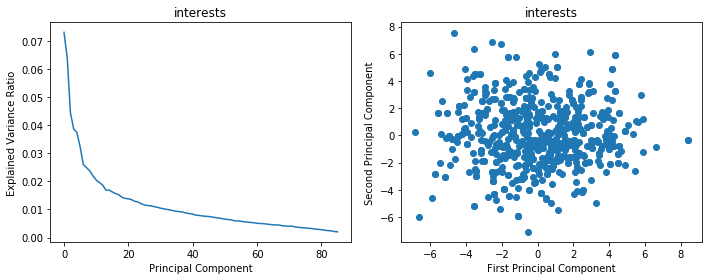

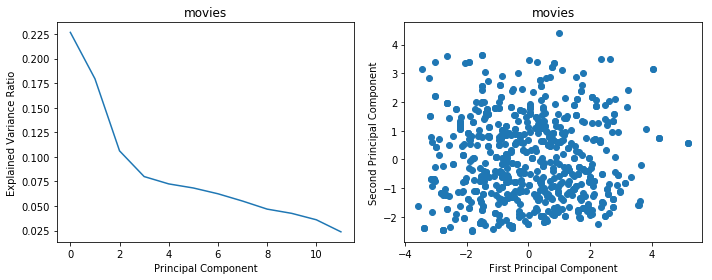

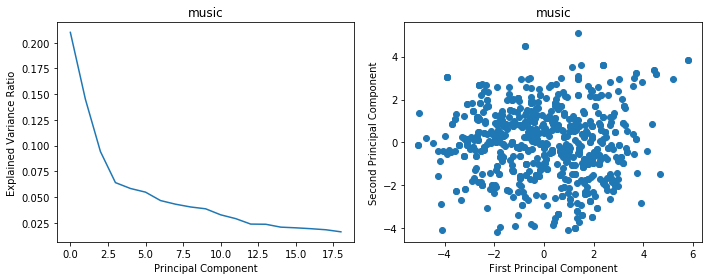

In [6]:
for k in data.keys():
    scaled = scale(data[k])
    pca = PCA()
    pca.fit(scaled)
    projected = pca.fit_transform(scaled)
    plt.figure(figsize=(10,4)) 
    plt.subplot(1, 2, 1)
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(k)
    plt.subplot(1, 2, 2)
    plt.scatter(projected[:,0],projected[:,1])
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(k)
    plt.tight_layout()
    plt.show()